# Spectral Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import math

In [2]:
np.random.seed(421)

In [10]:
X = np.genfromtxt("data_set.csv", delimiter = ',')

In [12]:
K=5
N=len(X[:,0])
print(K)
print(N)

5
300


## Data Visualization

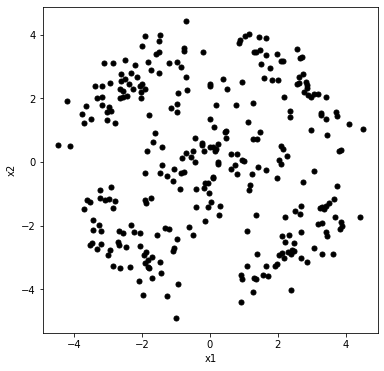

In [13]:
plt.figure(figsize = (6, 6))
plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [14]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances

## Euclidean Distances
Calculation of Euclidean distances between the pairs of data points. The data point pairs with distance less than or equal to 𝛿 = 1.25 are considered as connected. 

In [15]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x <= 1.25 else 0)
W = np.vectorize(vectorizer)(W)
print(W,W.shape)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]] (300, 300)


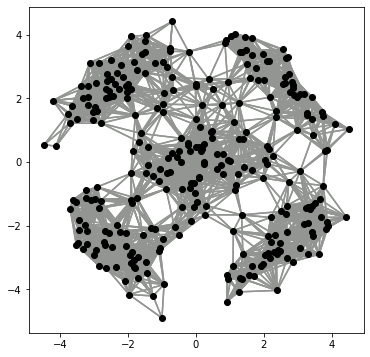

In [21]:
plt.figure(figsize=(6,6))
for i in range(N):
    for j in range(N):
        if W[i,j] == 1:
            x1, x2 = X[i,0], X[j,0]
            y1, y2 = X[i,1], X[j,1]
            plt.plot([x1,x2],[y1,y2], '#929591')
plt.plot(X[:,0], X[:,1], 'ko',linewidth=0.2)
plt.show()


## Degree Matrix

In [22]:
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)
print(D.shape)

degree matrix:
[[21  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0 15]]
(300, 300)


## Laplacian Matrix

In [23]:
L = D - W
print('laplacian matrix:')
print(L)

laplacian matrix:
[[20  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 14]]


## Laplacian Symetric Matrix

In [24]:
I=np.identity(300)
L = I - (np.linalg.inv(np.sqrt(D)).dot(W)).dot(np.linalg.inv(np.sqrt(D)))

print("Laplacian normalized:")
print(L)

Laplacian normalized:
[[0.952 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.909 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.960 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.955 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.971 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.933]]


In [25]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
print(e.shape)
# eigenvectors
print('eigenvectors:')
print(v)
print(v.shape)

eigenvalues:
[5.55111512e-17+0.00000000e+00j 2.07171267e-02+0.00000000e+00j
 1.27492231e-02+0.00000000e+00j 1.02040553e-02+0.00000000e+00j
 4.52553534e-02+0.00000000e+00j 1.76255221e-01+0.00000000e+00j
 1.97995661e-01+0.00000000e+00j 2.26962155e-01+0.00000000e+00j
 2.23036737e-01+0.00000000e+00j 2.73800945e-01+0.00000000e+00j
 3.60541914e-01+0.00000000e+00j 3.93776490e-01+0.00000000e+00j
 4.02692409e-01+0.00000000e+00j 4.34298613e-01+0.00000000e+00j
 4.46146883e-01+0.00000000e+00j 4.72279519e-01+0.00000000e+00j
 4.79325055e-01+0.00000000e+00j 5.40853440e-01+0.00000000e+00j
 5.78476282e-01+0.00000000e+00j 6.08167748e-01+0.00000000e+00j
 6.33336559e-01+0.00000000e+00j 6.65586145e-01+0.00000000e+00j
 6.66508767e-01+0.00000000e+00j 6.83494096e-01+0.00000000e+00j
 6.94427072e-01+0.00000000e+00j 7.37266523e-01+0.00000000e+00j
 1.21617041e+00+0.00000000e+00j 1.21147432e+00+0.00000000e+00j
 7.61436725e-01+0.00000000e+00j 7.70799288e-01+0.00000000e+00j
 7.83609497e-01+0.00000000e+00j 8.00181701

In [26]:
eig_min=e.argsort()[1:6]
print(eig_min)

[3 2 1 4 5]


In [27]:
e = np.real(e)
v =np.real(v)
eig_min = np.argsort(e)
Z= v[:,eig_min[1:6]]
print(Z,Z.shape)


[[0.002 0.030 -0.122 -0.053 -0.060]
 [0.020 0.016 -0.062 -0.025 0.134]
 [0.007 0.030 -0.129 -0.052 0.055]
 ...
 [0.001 0.001 -0.034 0.067 0.032]
 [-0.014 -0.012 -0.014 0.118 -0.014]
 [-0.025 0.032 -0.002 0.008 -0.041]] (300, 5)


In [28]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        row_ind = np.array([28,142,204,270,276])
        centroids = X[row_ind]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

In [29]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

Iteration#15:


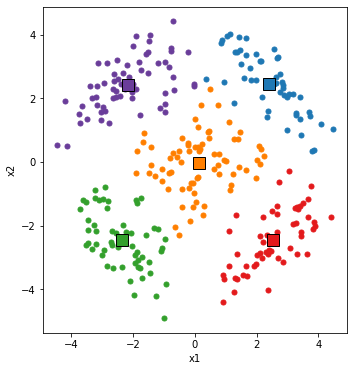

In [31]:
centroids = None
memberships = None
iteration = 1
while True:


    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        plt.show()
        break


    iteration = iteration + 1
    
centroidsX = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])

print("Iteration#{}:".format(iteration))    
plt.figure(figsize = (12, 6))    
plt.subplot(1, 2, 1)
plot_current_state(centroidsX, memberships, X)
plt.show()

